In [1]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [3]:
df = pd.read_csv(r'..\data\cyberbullying_tweets.csv')

In [4]:
df_sample = df.sample(10)
df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [5]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [6]:
STOPWORDS = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def clean_text(text):
    text = str(text)
    
    links_re = r'https?://\S+|www\.\S+|\S+\.[a-z]+'
    hashtags_re = r'#[A-Za-z0-9]+' # probably keep this
    hashtags_re = r'#'
    mentions_re = r'@[A-Za-z0-9]+'
    rt_re = r'RT'
    
    # remove patterns
    re_patterns = '|'.join([links_re, hashtags_re, mentions_re, rt_re])
    text = re.sub(re_patterns, '', text)
    
    # remove punctuations
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    
    # lower case
    text = text.lower()
    
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    
    # lemmatize words
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
        
    return text

# Clean Small Sample

In [7]:
df_sample

,tweet_text,cyberbullying_type
20099,This is true. White nationalist terror is more...,religion
13603,What's going on is you're sexist @OliverHunter...,gender
32709,tweeted on my personal that harry was in nj an...,age
45042,Kapernick you stupid fucking nigger piece of s...,ethnicity
3239,omg cringe at the intro #MKR,not_cyberbullying
27442,@SwiggyCares this is pathetic. What the hell i...,other_cyberbullying
39817,"@TheRebelTiger , @TheFantasyNinja , and I were...",ethnicity
38867,I had a meeting with my old roommate about how...,age
36442,idc he totally just reads to me like the type ...,age
18003,Pauline Hanson ~Wants to kick out Asians and M...,religion


In [8]:
df_sample['tweet_text'] = df_sample.tweet_text.apply(lambda text: clean_text(text))
df_sample

,tweet_text,cyberbullying_type
20099,true white nationalist terror danger american ...,religion
13603,whats going youre sexist sexist know 1 funny g...,gender
32709,tweeted personal harry nj every girl high scho...,age
45042,kapernick stupid fucking nigger piece shit fuc...,ethnicity
3239,omg cringe intro mkr,not_cyberbullying
27442,pathetic hell wrong guy,other_cyberbullying
39817,arepa spot went check order inside white perso...,ethnicity
38867,meeting old roommate dirty left kitchenetc fir...,age
36442,idc totally read like type person would bully ...,age
18003,pauline hanson want kick asian muslim denies c...,religion


# Clean All

In [9]:
df['tweet_text'] = df.tweet_text.apply(lambda text: clean_text(text))
df.head(10)

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,classy whore red velvet cupcake,not_cyberbullying
3,gio meh p thanks head concerned another angry ...,not_cyberbullying
4,isi account pretending kurdish account like is...,not_cyberbullying
5,yes test god good bad indifferent weird whatev...,not_cyberbullying
6,itu sekolah ya bukan tempat bully ga jauh kaya...,not_cyberbullying
7,karma hope bite kat butt nasty mkr,not_cyberbullying
8,everything mostly priest,not_cyberbullying
9,rebecca black drop school due bullying,not_cyberbullying


# Visualize Gender-based Tweets

In [10]:
df.tweet_text[df['cyberbullying_type']=='gender'].sample(10)

14235    im sexist except sexist believe certain gender...
15517    im bisexual raped age 9 still find rapegay jok...
11278    sexist im glad therell female driver f1 imagin...
15423                      im sexist bitch cant drive shit
9876                tv editing kat natural nasty bitch mkr
13235    movie explictly way one antifascist doesnt get...
8054     murdered baby ok rape joke ok holocaust joke f...
11310    way im reminded maria witch show cute witch hu...
8426     haha joke havent started anything yet cry arch...
15179    420 l millbauer dad dead joke dont phase fam i...
Name: tweet_text, dtype: object

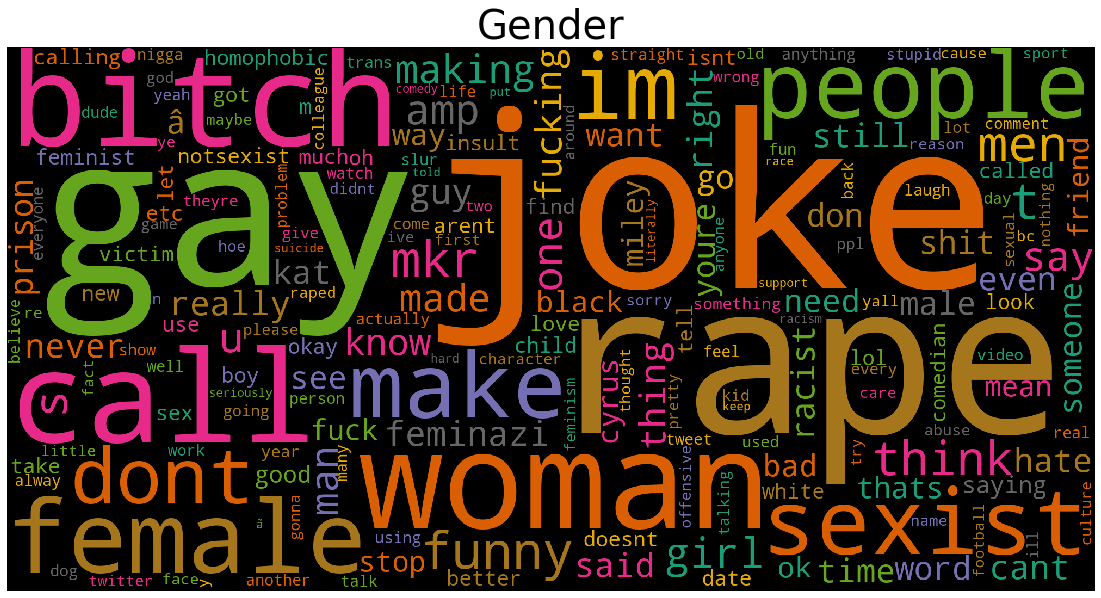

In [11]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='gender']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

# Visualize Age-based Tweets

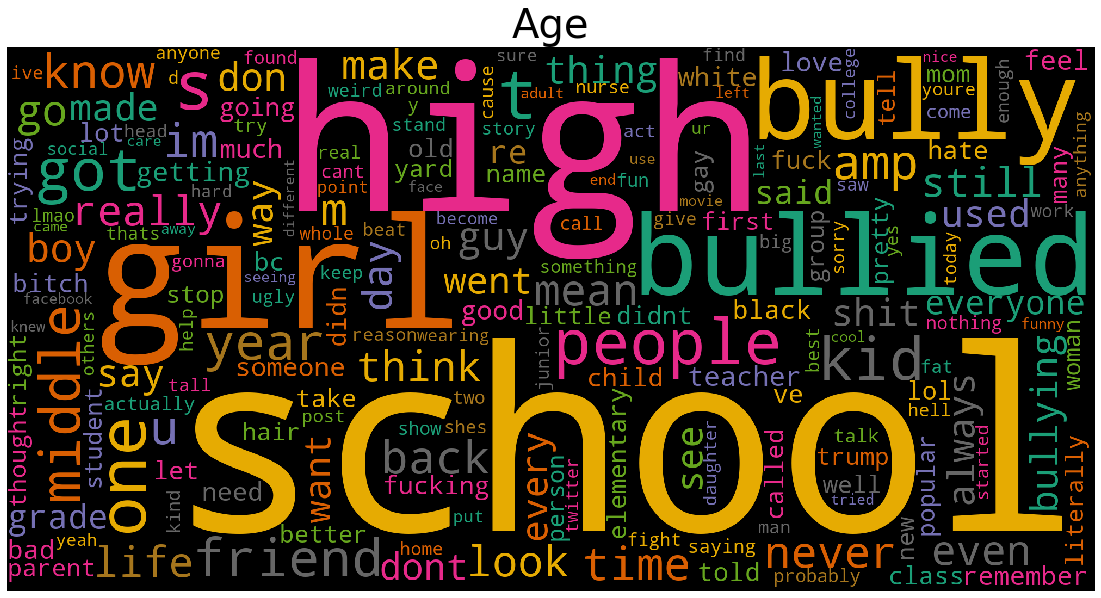

In [12]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='age']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud1)